In [1]:
pip install tensorflow numpy matplotlib opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input


In [3]:
# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model that outputs the features from the last layer of the base model
model = Model(inputs=base_model.input, outputs=base_model.output)


In [4]:
def load_and_preprocess_image(img_path):
    # Load the image with the target size
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess for VGG16
    return img_array

def extract_features(img_path):
    img_array = load_and_preprocess_image(img_path)
    features = model.predict(img_array)  # Extract features
    return features.flatten()  # Flatten the features to 1D


from sklearn.metrics.pairwise import cosine_similarity

def compare_images(img_path1, img_path2):
    features1 = extract_features(img_path1)
    features2 = extract_features(img_path2)
    
    # Reshape features for cosine similarity
    features1 = features1.reshape(1, -1)
    features2 = features2.reshape(1, -1)

    # Calculate cosine similarity
    similarity = cosine_similarity(features1, features2)
    return similarity[0][0]  # Return the similarity score

def display_images_and_similarity(img_path1, img_path2):
    similarity_score = compare_images(img_path1, img_path2)
    
    # Load images for display
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)

    # Convert BGR to RGB format for display
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title(f"Image 1")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title(f"Image 2")
    plt.axis('off')
    
    plt.suptitle(f"Similarity Score: {similarity_score:.2f}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


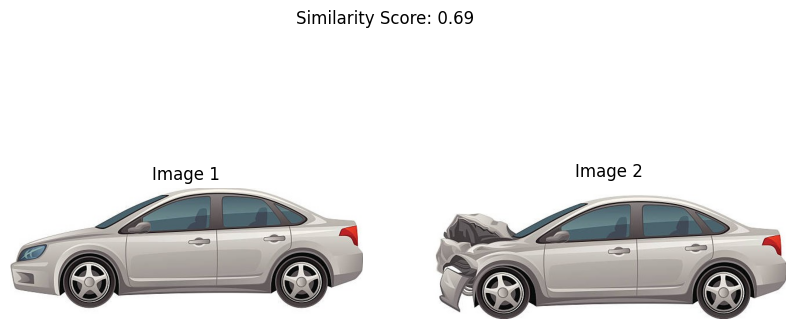

In [5]:

display_images_and_similarity('Before/Before_test1.jpg', 'After/After_test1.jpg')


In [6]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
from skimage import exposure, img_as_float


In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

def extract_features(img_path):
    # Load the pre-trained VGG16 model without the top layers
    model = VGG16(weights='imagenet', include_top=False)
    
    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Extract features
    features = model.predict(img_array)
    
    # Flatten the features to a 1D array
    return features.flatten()

def calculate_damage_mask(img_path1, img_path2):
    # Extract features from both images
    features1 = extract_features(img_path1)
    features2 = extract_features(img_path2)

    # Calculate the absolute difference between the two feature sets
    damage_vector = np.abs(features2 - features1)

    # Normalize the damage vector for visualization
    damage_vector_normalized = (damage_vector - np.min(damage_vector)) / (np.max(damage_vector) - np.min(damage_vector))

    # Instead of reshaping, return the normalized vector as is
    return damage_vector_normalized

def highlight_damage_on_image(after_img_path, damage_vector):
    # Load the "after" image
    after_img = cv2.imread(after_img_path)

    # Create a heatmap from the damage vector
    heatmap = cv2.applyColorMap((damage_vector * 255).astype(np.uint8), cv2.COLORMAP_JET)

    # Resize heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap, (after_img.shape[1], after_img.shape[0]))

    # Combine the original image with the heatmap
    combined = cv2.addWeighted(after_img, 0.5, heatmap_resized, 0.5, 0)

    return after_img, combined

def analyze_damage(before_img_path, after_img_path):
    # Calculate the damage mask
    damage_vector = calculate_damage_mask(before_img_path, after_img_path)

    # Debugging: Check the shape and type of damage_vector
    print("Damage Vector Shape:", damage_vector.shape)
    print("Damage Vector Type:", damage_vector.dtype)

    # Highlight damage on the "after" image
    after_img, combined_img = highlight_damage_on_image(after_img_path, damage_vector)

    # Display the images
    plt.figure(figsize=(15, 7))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(after_img, cv2.COLOR_BGR2RGB))
    plt.title("After Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(damage_vector.reshape(1, -1), cmap='hot', aspect='auto')  # Display the damage vector as a heatmap
    plt.title("Damage Vector")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
    plt.title("Highlighted Damage")
    plt.axis('off')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Damage Vector Shape: (25088,)
Damage Vector Type: float32


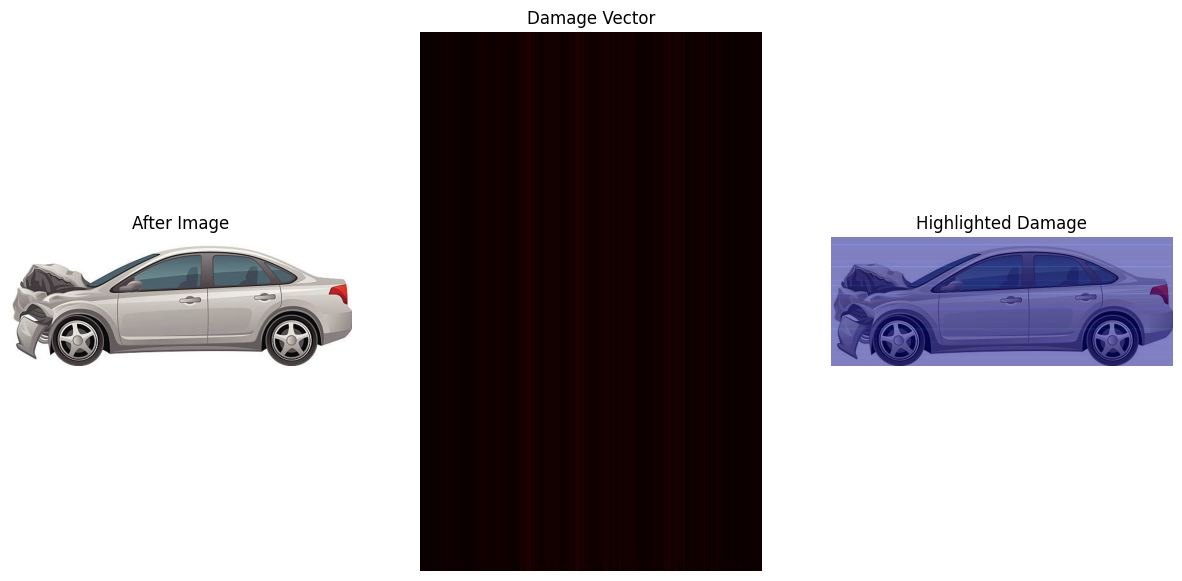

In [20]:
analyze_damage('Before/Before_test1.jpg', 'After/After_test1.jpg')
